In [1]:
## XGBoost 
# State 1 hot 
# Rurality Data
# SVI poverty index
# Minority?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import xgboost as xgb 
import shap
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import pairwise
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
main_path = Path.cwd()
data_path = main_path / 'Data'

#svi = pd.read_csv( data_path / 'Master Project Data' /'SVI Tract Data.csv',  )


In [32]:
# import stored methods 
path = Path.cwd()
main_path = Path.cwd()
data_path = main_path / 'Data'
from src.data import DataLoaders

ACS_forGEOIDS =  DataLoaders.ACSData(2016,'block_group')
ARC =  DataLoaders.ARCPData()

In [33]:
ACS_forGEOIDS = ACS_forGEOIDS.data
ACS_forGEOIDS['Tract'] = ACS_forGEOIDS.index.str[:-1]
ACS_forGEOIDS['geos'] = ACS_forGEOIDS.index

In [37]:
ACS_forGEOIDS = ACS_forGEOIDS[['Tract', 'geos']]
ACS_forGEOIDS

,Tract,geos
GEOID,,
010010201001,01001020100,010010201001
010010201002,01001020100,010010201002
010010202001,01001020200,010010202001
010010202002,01001020200,010010202002
010010203001,01001020300,010010203001
...,...,...
560459511001,56045951100,560459511001
560459511002,56045951100,560459511002
560459513001,56045951300,560459513001


In [23]:
SVI = pd.read_csv('C:/Users/cle9a/Documents/rcp2/Data/Master Project Data/SVI Tract Data.csv',encoding='ISO-8859-1')
SVI['Tract'] = SVI['GEOID'].str[2:]

SVI

,GEOID,ST,STATE,ST_ABBR,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Tract
0,#_01015981901,1,ALABAMA,AL,Calhoun,"Census Tract 9819.01, Calhoun County, Alabama",24.243865,0,12,0,...,NaN,NaN,NaN,NaN,0,12,NaN,NaN,656.0,01015981901
1,#_01015981902,1,ALABAMA,AL,Calhoun,"Census Tract 9819.02, Calhoun County, Alabama",34.646714,0,12,0,...,NaN,NaN,NaN,NaN,0,12,NaN,NaN,146.0,01015981902
2,#_01015981903,1,ALABAMA,AL,Calhoun,"Census Tract 9819.03, Calhoun County, Alabama",13.926276,0,12,0,...,NaN,NaN,NaN,NaN,0,12,NaN,NaN,0.0,01015981903
3,#_01097003605,1,ALABAMA,AL,Mobile,"Census Tract 36.05, Mobile County, Alabama",0.732300,899,316,0,...,NaN,1.0,NaN,NaN,33,36,3.7,4.1,5135.0,01097003605
4,#_01097990000,1,ALABAMA,AL,Mobile,"Census Tract 9900, Mobile County, Alabama",0.000000,0,12,0,...,NaN,NaN,NaN,NaN,0,12,NaN,NaN,0.0,01097990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72832,#_51003010903,51,VIRGINIA,VA,Albemarle,"Census Tract 109.03, Albemarle County, Virginia",0.378015,3159,553,98,...,1.0,1.0,4.0,6.0,67,47,2.1,1.3,12094.0,51003010903
72833,#_51121020202,51,VIRGINIA,VA,Montgomery,"Census Tract 202.02, Montgomery County, Virginia",2.278257,2000,232,1140,...,1.0,1.0,4.0,7.0,102,64,6.0,3.6,2222.0,51121020202
72834,#_51700030100,51,VIRGINIA,VA,Newport News City,"Census Tract 301, Newport News city, Virginia",1.636259,4274,612,1647,...,1.0,1.0,4.0,9.0,436,139,14.9,4.6,6558.0,51700030100
72835,#_53033005302,53,WASHINGTON,WA,King,"Census Tract 53.02, King County, Washington",0.968062,5320,629,127,...,1.0,1.0,4.0,7.0,267,98,5.1,1.8,40043.0,53033005302


In [39]:
merged = ACS_forGEOIDS.merge(SVI, how = 'left', left_on = 'Tract' , right_on ='Tract')
merged

,Tract,geos,GEOID,ST,STATE,ST_ABBR,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,01001020100,010010201001,#_01001020100,1,ALABAMA,AL,Autauga,"Census Tract 201, Autauga County, Alabama",3.790677,1923,...,0.0,0.0,0.0,0.0,0.0,178,79,9.3,4.1,1018.0
1,01001020100,010010201002,#_01001020100,1,ALABAMA,AL,Autauga,"Census Tract 201, Autauga County, Alabama",3.790677,1923,...,0.0,0.0,0.0,0.0,0.0,178,79,9.3,4.1,1018.0
2,01001020200,010010202001,#_01001020200,1,ALABAMA,AL,Autauga,"Census Tract 202, Autauga County, Alabama",1.284051,2028,...,0.0,0.0,1.0,1.0,1.0,190,77,10.4,4.1,3835.0
3,01001020200,010010202002,#_01001020200,1,ALABAMA,AL,Autauga,"Census Tract 202, Autauga County, Alabama",1.284051,2028,...,0.0,0.0,1.0,1.0,1.0,190,77,10.4,4.1,3835.0
4,01001020300,010010203001,#_01001020300,1,ALABAMA,AL,Autauga,"Census Tract 203, Autauga County, Alabama",2.065365,3476,...,0.0,0.0,0.0,0.0,1.0,119,81,3.4,2.2,1836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213139,56045951100,560459511001,#_56045951100,56,WYOMING,WY,Weston,"Census Tract 9511, Weston County, Wyoming",2355.226087,3286,...,0.0,0.0,1.0,2.0,2.0,399,141,13.3,4.4,1933.0
213140,56045951100,560459511002,#_56045951100,56,WYOMING,WY,Weston,"Census Tract 9511, Weston County, Wyoming",2355.226087,3286,...,0.0,0.0,1.0,2.0,2.0,399,141,13.3,4.4,1933.0
213141,56045951300,560459513001,#_56045951300,56,WYOMING,WY,Weston,"Census Tract 9513, Weston County, Wyoming",42.777804,3814,...,0.0,0.0,0.0,1.0,1.0,499,157,13.3,4.0,3643.0
213142,56045951300,560459513002,#_56045951300,56,WYOMING,WY,Weston,"Census Tract 9513, Weston County, Wyoming",42.777804,3814,...,0.0,0.0,0.0,1.0,1.0,499,157,13.3,4.0,3643.0


In [44]:
merged.set_index('geos', inplace=True)
cols = ['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3','RPL_THEME4']
SVI = merged[cols]
SVI

,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,
010010201001,0.3913,0.5597,0.3735,0.0993
010010201002,0.3913,0.5597,0.3735,0.0993
010010202001,0.7065,0.3585,0.5821,0.7299
010010202002,0.7065,0.3585,0.5821,0.7299
010010203001,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...
560459511001,0.3925,0.6370,0.2331,0.8555
560459511002,0.3925,0.6370,0.2331,0.8555
560459513001,0.5093,0.6043,0.2862,0.6949


In [45]:
ARC = ARC.data
ARC

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534590,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [31]:
ARC.columns

Index(['geoid', 'census_block_group_y', 'census_block_group_x', 'city',
       'state', 'zip', 'county', 'in_home_visit_date',
       'smoke_alarms_installed__9_volt_10_year_dhh_',
       '10_year_and_9_volt_alarms_installed', 'dhh_alarms_installed',
       'pre_existing_alarms', 'pre_existing_alarms_tested_and_working',
       'batteries_replaced', 'fire_escape_plans_made',
       'fire_safety_checklists_completed',
       'additional_hazard_education_conducted', 'additional_hazard_type',
       'people_served', 'youth_served', 'seniors_served',
       'veterans_military_members_and_military_family_members_served',
       'individuals_with_disabilities_access_or_functional_needs_served'],
      dtype='object')

In [7]:
# import stored methods 
#path = Path.cwd().parent.parent

#LoadAndCleanARCP = main_path /'src' /'data'/ 'LoadAndCleanARCP.py'
#LoadAndCleanACS = main_path /'src' /'data'/ 'LoadAndCleanACS.py'
# Run methods to obtain clean datasets 

#%run $LoadAndCleanARCP
#%run $LoadAndCleanACS

              RPL_THEME1  RPL_THEME2  RPL_THEME3  RPL_THEME4
geos                                                        
010010201001      0.3913      0.5597      0.3735      0.0993
010010201002      0.3913      0.5597      0.3735      0.0993
010010202001      0.7065      0.3585      0.5821      0.7299
010010202002      0.7065      0.3585      0.5821      0.7299
010010203001      0.5659      0.8729      0.6429      0.3882


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


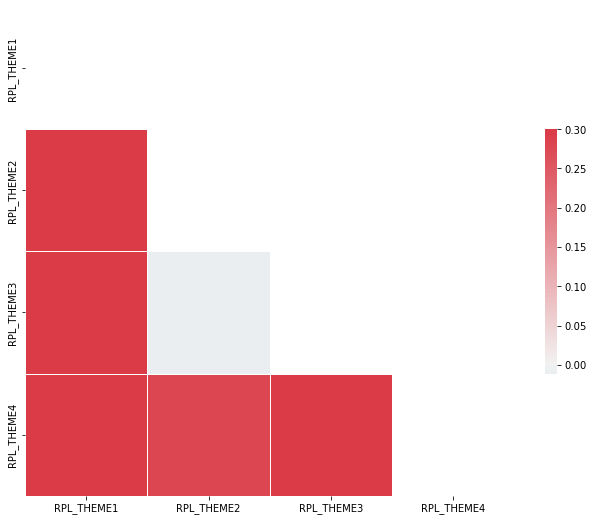

In [47]:
#Find correlated features in ACS dataset and identify the highly correlated relationships

# Create ACS correlation matrix
corr = SVI.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
 





#From highly correlated pairs, remove one of the Pair Vars from the ACS dataset except for the 'mort' variables
#ACS = ACS.drop(['house_pct_vacant', 'did_not_work_past_12_mo', 'house_pct_non_family', 'house_pct_rent_occupied',
#                           'race_pct_white', 'race_pct_nonwhitenh','race_pct_hisp', 'house_pct_incomplete_plumb',
#                           'house_pct_incomplete_kitchen', 'race_pct_whitenh','house_no_mort',
#                           'race_pct_black','house_pct_live_alone','house_pct_family_married','educ_bachelors',
#                           'heat_pct_electricity','house_pct_complete_kitchen','house_yr_pct_1960_2000'], axis=1) 





print (SVI.head())


In [14]:
#ACS['house_pct']

KeyError: 'house_pct'

In [48]:
# smoke detector statistical model munging
#sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelOutput.csv')
sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelMultiLevel.csv')
print(np.unique(sm.geography))
sm


['block_group' 'county' 'state' 'tract']


,geoid,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography
0,#_010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group
1,#_010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group
2,#_010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group
3,#_010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group
4,#_010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group
...,...,...,...,...,...,...,...,...,...
213734,#_560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213735,#_560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213736,#_560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213737,#_560459513002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state


In [49]:
sm['geoid'] = sm['geoid'].str[2:]
sm['tract'] = sm['geoid'].str[:-1]
sm.set_index('geoid', inplace =  True)
sm_all = sm.copy()
#sm_all = sm[ sm['geography'].isin(['county','state']) ]

sm = sm[ sm['geography'].isin(['tract','block_group']) ]

sm_all

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500
...,...,...,...,...,...,...,...,...,...
560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951300


In [50]:
sm

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500
...,...,...,...,...,...,...,...,...,...
560210004012,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401
560210004013,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401
560210004014,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401


In [51]:
def create_rurality_data(sm,subset_county = False): 
    #Rurality Data Munging 
    rd = pd.read_csv( data_path / 'Master Project Data' /'Tract Rurality Data.csv', dtype = {'Tract':'object'},encoding = 'latin-1' )
    rd['Population Density (per square mile), 2010'] =  rd['Population Density (per square mile), 2010'].str.replace(',','').astype('float')
    rd = rd.iloc[:,[0,2,4,6,8]]
    block_tract = sm['tract'].to_frame()
    block_tract = block_tract.reset_index()
    rd = block_tract.merge(rd, how = 'left', left_on = 'tract' , right_on ='Tract')
    rd.set_index('geoid',inplace= True)
    rd = rd.iloc[:,2:]
    rd['Select State'] = rd['Select State'].astype('category')

    # add state level model estimates 
    sms = pd.rd = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelState.csv')
    sms['geoid'] = sms['geoid'].str[2:]
    sms =  sms.loc[:,['geoid','detectors_found_prc']]
    sms = sms.rename(columns= {'geoid':'state_geoid'}  )

    rd['state_geoid'] = rd.index.str[:2]
    rd = rd.reset_index()
    rd = rd.merge(sms,how = 'left', on = 'state_geoid' )
    rd.drop('state_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'state_detectors_found_prc'}) 
    rd = rd.set_index('geoid')


    # add county level estimates
    smc = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelCounty.csv')
    smc['geoid'] = smc['geoid'].str[2:]
    if subset_county:
        smc.iloc[0::2,:] = np.nan
    smc =  smc.loc[:,['geoid','detectors_found_prc']]
    smc = smc.rename(columns= {'geoid':'county_geoid'}  )

    rd['county_geoid'] = rd.index.str[:5]
    rd = rd.reset_index()
    rd = rd.merge(smc,how = 'left', on = 'county_geoid' )
    rd.drop('county_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'county_detectors_found_prc'}) 
    rd = rd.set_index('geoid')
  #  rd['RUCA_rurality_index'] = rd['Primary RUCA Code 2010']
  #  rd[rd['RUCA_rurality_index'] > 10 ] = np.NaN
    rd = rd.iloc[:,3:]

    return rd 

# alternative 1 hot based encoding
#rd = rd.merge( pd.get_dummies(rd['Select State']), how = 'left', on= 'geoid')


In [52]:
rd = create_rurality_data(sm,True)
rd_all = create_rurality_data(sm_all)

In [53]:
rd

,"Population Density (per square mile), 2010",state_detectors_found_prc,county_detectors_found_prc
geoid,,,
010139534001,NaN,58.37,NaN
010139534002,NaN,58.37,NaN
010730023034,NaN,58.37,NaN
010730035002,NaN,58.37,NaN
010730035003,NaN,58.37,NaN
...,...,...,...
560210004012,NaN,63.00,55.44
560210004013,NaN,63.00,55.44
560210004014,NaN,63.00,55.44


In [54]:
def train_model(X = rd, SVI = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not SVI.empty:
        X = X.merge(SVI, how ='left',left_index = True, right_index = True)
        print(X.size)
        print(y.size)
        #X = X[X.index.isin(y.index)]
        #y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



In [55]:
def train_model_justSVI(SVI = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not SVI.empty:
        X = SVI
        print(X.size)
        print(y.size)
        X = X[X.index.isin(y.index)]
        y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



109200
15600
109200
15600
-----Training_Performance------
64.79835657635698
Test RMSE: 8.04974264038031
Test MAE: 5.744964493532783


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


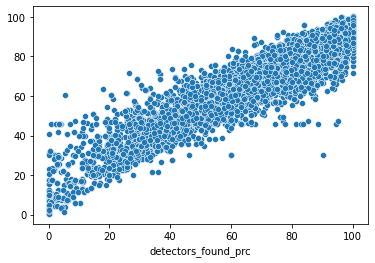

-----Test Performance ----- 
Test RMSE: 10.3126815100452
Test MAE: 7.293302634361844


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


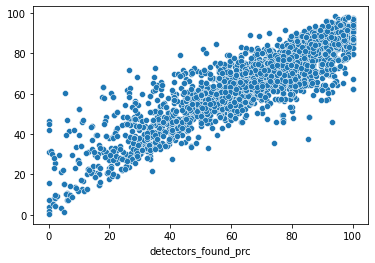

Test Correlation: (0.8897842440777631, 0.0)
Test R-squared: 0.7835182748885949

 Feature ranking:
1. county_detectors_found_prc (0.450693)
2. state_detectors_found_prc (0.168689)
3. RPL_THEME1 (0.106991)
4. RPL_THEME3 (0.097709)
5. RPL_THEME2 (0.092276)
6. RPL_THEME4 (0.083643)
7. Population Density (per square mile), 2010 (0.000000)


In [56]:
mdl,X_test,y_test = train_model(X = rd, SVI=SVI, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


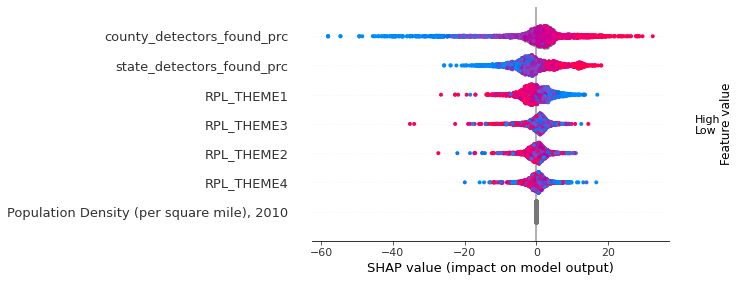

In [57]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

852576
15600
62024
15506
-----Training_Performance------
120.74822022572602
Test RMSE: 10.988549505086011
Test MAE: 8.249864421290223


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


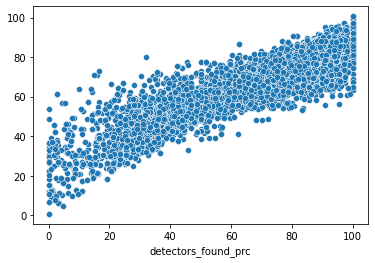

-----Test Performance ----- 
Test RMSE: 13.686881429830965
Test MAE: 10.124904053741544


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


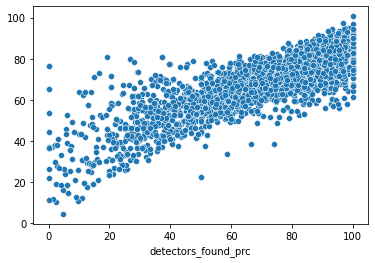

Test Correlation: (0.8097894140535524, 0.0)
Test R-squared: 0.6182451624023089

 Feature ranking:
1. RPL_THEME1 (0.284256)
2. RPL_THEME4 (0.247271)
3. RPL_THEME3 (0.244669)
4. RPL_THEME2 (0.223804)


In [59]:
mdl_justSVI,X_test,y_test = train_model_justSVI(SVI = SVI, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


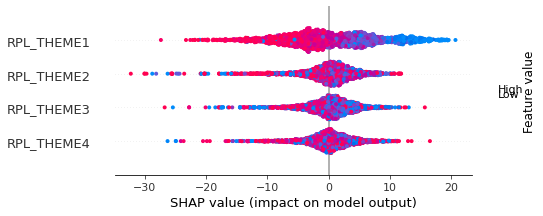

In [61]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl_justSVI).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

In [64]:
sm_all['rd_SVI'] =  mdl.predict(rd_all.merge(SVI,how = 'left', left_index = True, right_index = True) )
sm_all['Just_SVI'] =  mdl_justSVI.predict(rd_all.merge(SVI,how = 'left', left_index = True, right_index = True)[cols])

In [65]:
sm_all.loc[:,['num_surveys','geography',
              'detectors_found_prc',
              'detectors_working_prc',
              'rd_SVI',
              'Just_SVI'] ]
sm_all = sm_all.merge(rd_all['Population Density (per square mile), 2010'],how = 'left',left_index = True,right_index = True)
sm_all.index =  '#_' + sm_all.index 

In [66]:
sm_all.to_csv(path / 'Data' / 'Model Outputs' / 'SmokeAlarmPredictiveModel_USA_SVI.csv')

In [78]:
sm_all.columns

Index(['num_surveys', 'detectors_found_total', 'detectors_found_prc',
       'detectors_found_CI', 'detectors_working_total',
       'detectors_working_prc', 'detectors_working_CI', 'geography', 'tract',
       'Full_Predictions', 'ACS_commonCols_Predictions', 'No_ACS_Predictions',
       'Avg_Predictions', 'Population Density (per square mile), 2010'],
      dtype='object')

In [67]:
# REST OF NOTEBOOK IS OLD

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

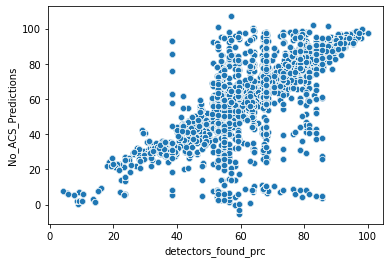

In [79]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['No_ACS_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='ACS_commonCols_Predictions'>

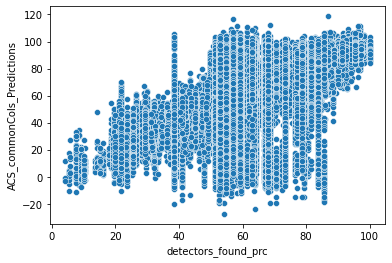

In [80]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['ACS_commonCols_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Full_Predictions'>

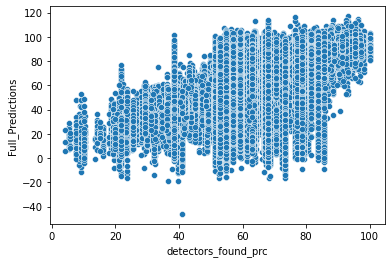

In [81]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Full_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

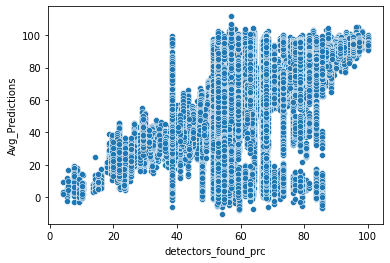

In [83]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Avg_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

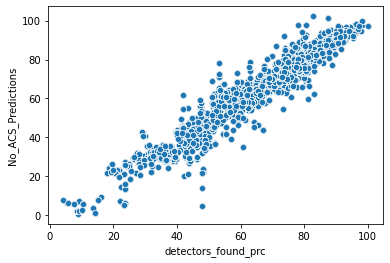

In [84]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'county') ,sm_all['No_ACS_Predictions'].where(sm_all['geography'] == 'county' ) )


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

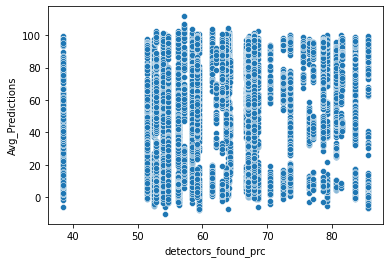

In [85]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'state') ,sm_all['Avg_Predictions'].where(sm_all['geography'] == 'state' ) )